In [1]:
import os
import dill
import h5py
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

import TwoPUtils as tpu
import InVivoDA_analyses as InVivoDA
import STX3KO_analyses as stx
import social_int_analyses as SI

from social_int_analyses import utilities_ES as u
from social_int_analyses import sleap_utils as slp

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [614]:
def update_sess_dict(mouse, f, KO = True):
    scan_str = "%s_%03d_%03d" % (f['scene'],f['session'] ,f['scan'])

    # scan_str = "%s" % (f['scene']) # ,f['session']  ,f['scan'])
    
    source_folder = "C:/Users/esay/data/social_interaction/VRData"
    source_stem = os.path.join(source_folder, mouse, f['date'], f['scene'], scan_str)

    f['mouse']=mouse
    f.update({'vr_filename': os.path.join("C:/Users/esay/data/social_interaction/VRData",f['mouse'],f['date'],"%s_%d.sqlite" %(f['scene'],f['session'])),
              'scan_number': f['scan'],
              'prompt_for_keys': False,
              'VR_only': True,
              'scanner': "NLW",
             })
    if 'wheel' in f['scene']:
        f.update(
            {'fixed_wheel': True
            })
    if 'social' in f['scene']:
        # print(f['scene'])
        f.update({
            'tunnel_data': True
        })
    if 'emptytunnel' in f['scene']:
        # print(f['scene'])
        f.update({
            'tunnel_data': False
        })
    return f

In [2]:
social_int_behavior = SI.social_int_sess_deets.social_VR_sessions
social_mice = SI.social_int_sess_deets.social_mice

In [626]:
social_int_behavior

{'social-0914-1': ({'date': '03_10_2024',
   'scene': 'Env1_to_Env2_fixreward',
   'session': 1,
   'scan': 1,
   'exp_day': 2},
  {'date': '03_10_2024',
   'scene': 'social_emptytunnel',
   'session': 1,
   'scan': 1,
   'exp_day': 2},
  {'date': '03_10_2024',
   'scene': 'social_restrict_fam',
   'session': 1,
   'scan': 1,
   'exp_day': 2},
  {'date': '03_10_2024',
   'scene': 'social_unrestrict_fam',
   'session': 1,
   'scan': 1,
   'exp_day': 2},
  {'date': '03_10_2024',
   'scene': 'social_wheel_restrict',
   'session': 1,
   'scan': 1,
   'exp_day': 2},
  {'date': '04_10_2024',
   'scene': 'Env1_to_Env2_fixreward',
   'session': 1,
   'scan': 1,
   'exp_day': 3},
  {'date': '04_10_2024',
   'scene': 'social_restrict_fam',
   'session': 1,
   'scan': 1,
   'exp_day': 3},
  {'date': '04_10_2024',
   'scene': 'social_restrict_nov',
   'session': 1,
   'scan': 1,
   'exp_day': 3},
  {'date': '04_10_2024',
   'scene': 'social_unrestrict_nov',
   'session': 1,
   'scan': 1,
   'exp_d

In [619]:
mouse = social_mice[1]
f = social_int_behavior[mouse][1]
print(f)
f_ = update_sess_dict(mouse,f)

{'date': '03_10_2024', 'scene': 'social_emptytunnel', 'session': 1, 'scan': 1, 'exp_day': 1, 'mouse': 'social-0914-4', 'vr_filename': 'C:/Users/esay/data/social_interaction/VRData\\social-0914-4\\03_10_2024\\social_emptytunnel_1.sqlite', 'scan_number': 1, 'prompt_for_keys': False, 'VR_only': True, 'scanner': 'NLW', 'tunnel_data': True}
social_emptytunnel
social_emptytunnel


In [620]:
f_

{'date': '03_10_2024',
 'scene': 'social_emptytunnel',
 'session': 1,
 'scan': 1,
 'exp_day': 1,
 'mouse': 'social-0914-4',
 'vr_filename': 'C:/Users/esay/data/social_interaction/VRData\\social-0914-4\\03_10_2024\\social_emptytunnel_1.sqlite',
 'scan_number': 1,
 'prompt_for_keys': False,
 'VR_only': True,
 'scanner': 'NLW',
 'tunnel_data': False}

In [621]:
_ = run_and_save(f_, social = True)

Fixing teleports


In [402]:
sess = tpu.sess.Session(**f_)

In [302]:
sess.align_VR_to_2P()

Fixing teleports


In [303]:
sess.vr_data

,time,morph,trialnum,pos,dz,posx,lick,reward,tstart,teleport,rzone,scanning,manrewards,autoreward,cmd,trainingtrack
0,4.647663,0.0,0,-5.0000,0.0000,0.0,0,0,0.0,0.0,0,0,0,0,2,1
1,4.662246,0.0,0,-5.0000,34.3743,0.0,0,0,0.0,0.0,0,0,0,0,2,1
2,5.468821,0.0,0,-5.0000,2.5926,0.0,0,0,0.0,0.0,0,0,0,0,2,1
3,5.579472,0.0,0,-5.0000,0.1788,0.0,0,0,0.0,0.0,0,0,0,0,2,1
4,5.620690,0.0,0,-5.0000,0.6258,0.0,0,0,0.0,0.0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,335.857200,0.0,14,10.6897,0.7599,0.0,0,0,0.0,0.0,0,1,0,0,0,1
18401,335.873600,0.0,14,11.4496,0.7599,0.0,0,0,0.0,0.0,0,1,0,0,0,1
18402,335.890000,0.0,14,12.1648,0.7152,0.0,0,0,0.0,0.0,0,1,0,0,0,1
18403,335.906400,0.0,14,12.8800,0.7152,0.0,0,0,0.0,0.0,0,1,0,0,0,1


In [722]:
def run_and_save(fdict,comb_frames=0, social = True):

            
    sess = tpu.sess.Session(**fdict)
    
    sess.align_VR_to_2P()
    # sess.get_trial_info()
    
    sess.add_timeseries(speed_raw=sess.vr_data['dz']._values)
    sess.add_pos_binned_trial_matrix('speed_raw', pos_key = 'pos')
    
    sess.add_timeseries(speed=sess.vr_data['dz']._values)
    sess.add_pos_binned_trial_matrix('speed', pos_key = 'pos', speed_thr=.01, speed = sess.timeseries['speed_raw'].ravel())

    if social == False: 
        err_lick, err = correct_lick_sensor_error(sess.vr_data['lick'],sess.trial_start_inds, sess.teleport_inds, correction_thr=0.5) #correct for broken sensor
        sess.add_timeseries(licks_rate = err_lick)
        sess.add_pos_binned_trial_matrix('licks_rate', pos_key = 'pos')# ,speed_thr=.01, speed = sess.timeseries['speed_raw'].ravel())
        sess.add_timeseries(licks=err_lick)
        sess.timeseries['licks'][sess.timeseries['licks']>1]=1
        sess.add_pos_binned_trial_matrix('licks', pos_key = 'pos')
    
        # sess.add_timeseries(licks_rate=sess.vr_data['lick']._values)
        # sess.add_pos_binned_trial_matrix('licks_rate')# ,speed_thr=.01, speed = sess.timeseries['speed_raw'].ravel())
        
        # sess.add_timeseries(licks=sess.vr_data['lick']._values)
        # sess.timeseries['licks'][sess.timeseries['licks']>1]=1
        # sess.add_pos_binned_trial_matrix('licks')
        
        licks = np.copy(sess.timeseries['licks'])
        licks[licks>1]=1
        time = sess.vr_data['time']
    
        reward_inds = np.argwhere(sess.vr_data['reward']._values==1).ravel()
        for r in reward_inds:
            licks[0,((time-time[r])>=0)&((time-time[r])<2)] = 0
    
        sess.add_timeseries(nonconsum_licks = licks)
        sess.add_pos_binned_trial_matrix('nonconsum_licks', pos_key = 'pos')
        
        sess.add_timeseries(licks_sum=licks)
        sess.add_pos_binned_trial_matrix('licks_sum',use_sum=True, pos_key = 'pos')
        
        # if fdict['mouse']=='4467975.4' and fdict['date']=="28_09_2020":
        #     print("nan it")
        #     for key in ('licks_rate', 'licks', 'nonconsum_licks', 'licks_sum'):
        #         print(sess.trial_matrices[key].shape)
        #         sess.trial_matrices[key][34:68,:]=np.nan
        #         fig,ax = plt.subplots()
        #         ax.imshow(sess.trial_matrices[key])
        #         print(np.isnan(sess.trial_matrices[key]).sum())
        
        for key in ('licks_rate', 'licks', 'nonconsum_licks', 'licks_sum'):
            print(np.isnan(sess.trial_matrices[key][0]).sum())
        TwoPUtils.sess.save_session(sess,'C:/Users/esay/data/social_interaction/VRPkls')
    
    TwoPUtils.sess.save_session(sess,'C:/Users/esay/data/social_interaction/VRPkls')
    return comb_frames+sess.vr_data.shape[0]

In [313]:
TwoPUtils.sess.save_session(sess,'C:/Users/esay/data/social_interaction/VRPkls')
print(0+sess.vr_data.shape[0])

18405


In [24]:
mouse = 'SparseKO_05'
f = sparse_sessions[mouse][4]
print(f)
f_ = update_sess_dict(mouse,f)
print(mouse, f_)
_ = run_and_save(f_)

{'date': '20_11_2024', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 20, 'novel_arm': -1, 'exp_day': 5, 'mouse': 'SparseKO_05', 'vr_filename': 'Z:/giocomo/esay/Stx3/VRData\\SparseKO_05\\20_11_2024\\YMaze_LNovel_1.sqlite', 'scan_number': 20, 'prompt_for_keys': False, 'VR_only': True, 'scanner': 'NLW'}
SparseKO_05 {'date': '20_11_2024', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 20, 'novel_arm': -1, 'exp_day': 5, 'mouse': 'SparseKO_05', 'vr_filename': 'Z:/giocomo/esay/Stx3/VRData\\SparseKO_05\\20_11_2024\\YMaze_LNovel_1.sqlite', 'scan_number': 20, 'prompt_for_keys': False, 'VR_only': True, 'scanner': 'NLW'}
Fixing teleports
0
0
0
0


In [336]:
def correct_lick_sensor_error(licks_, trial_starts, trial_ends, correction_thr=0.5):
    """
    Find samples where lick detector was putatively stuck at 1, and set to NaN

    :param licks_:
    :type licks_:
    :param trial_starts:
    :type trial_starts:
    :param trial_ends:
    :type trial_ends:
    :param correction_thr:
    :type correction_thr:
    :return:
    :rtype:
    """
    licks = np.copy(licks_)
    error_count = 0
    for t_start, t_end in zip(trial_starts, trial_ends):
        # if >50% of samples have a cumulative lick count of >2
        # print(licks[t_start:t_end])
        if sum(licks[t_start:t_end] > 0)/len(licks[t_start:t_end]) > correction_thr:
            licks[t_start:t_end] = 0
            # print(f'setting trial {np.where(trial_starts==t_start)[0]} to NaN')
            error_count += 1

    return licks, error_count

In [792]:
mouse = social_mice[0]

In [793]:
sess = SI.utilities_ES.load_vr_day(mouse,3)

{'date': '03_10_2024', 'scene': 'social_unrestrict_fam', 'session': 1, 'scan': 1, 'exp_day': 2, 'mouse': 'social-0914-1', 'vr_filename': 'C:/Users/esay/data/social_interaction/VRData\\social-0914-1\\03_10_2024\\social_unrestrict_fam_1.sqlite', 'scan_number': 1, 'prompt_for_keys': False, 'VR_only': True, 'scanner': 'NLW', 'tunnel_data': True}


In [810]:
sess.vr_data.shape

(37255, 16)

In [740]:
sess.trial_matrices.keys()

dict_keys(['speed_raw', 'speed'])

{'date': '03_10_2024', 'scene': 'Env1_to_Env2_fixreward', 'session': 1, 'scan': 1, 'exp_day': 2, 'mouse': 'social-0914-4', 'vr_filename': 'C:/Users/esay/data/social_interaction/VRData\\social-0914-4\\03_10_2024\\Env1_to_Env2_fixreward_1.sqlite', 'scan_number': 1, 'prompt_for_keys': False, 'VR_only': True, 'scanner': 'NLW'}


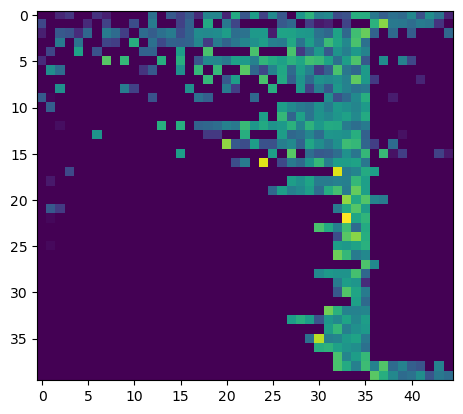

In [737]:
sess = SI.utilities_ES.load_vr_day(mouse,3)
fig,ax = plt.subplots()
ax.imshow(sess.trial_matrices['licks_rate'][0])

In [723]:
d = social_int_behavior;
for mouse, values in d.items():
    print(mouse)
    # print(values)
    for deets in values:
        print(deets)
        if 'social' in deets['scene']:
            print(True)
            f_ = update_sess_dict(mouse,deets)
        
            # print(mouse, f_)
            _ = run_and_save(f_, social = True)
            # print(comb_frames+sess.vr_data.shape[0])
        else:
            f_ = update_sess_dict(mouse,deets)
            print(mouse, f_)
            _ = run_and_save(f_, social = False)
            # print( comb_frames+sess.vr_data.shape[0])
            

social-0914-1
{'date': '03_10_2024', 'scene': 'Env1_to_Env2_fixreward', 'session': 1, 'scan': 1, 'exp_day': 2, 'mouse': 'social-0914-1', 'vr_filename': 'C:/Users/esay/data/social_interaction/VRData\\social-0914-1\\03_10_2024\\Env1_to_Env2_fixreward_1.sqlite', 'scan_number': 1, 'prompt_for_keys': False, 'VR_only': True, 'scanner': 'NLW'}
social-0914-1 {'date': '03_10_2024', 'scene': 'Env1_to_Env2_fixreward', 'session': 1, 'scan': 1, 'exp_day': 2, 'mouse': 'social-0914-1', 'vr_filename': 'C:/Users/esay/data/social_interaction/VRData\\social-0914-1\\03_10_2024\\Env1_to_Env2_fixreward_1.sqlite', 'scan_number': 1, 'prompt_for_keys': False, 'VR_only': True, 'scanner': 'NLW'}
Fixing teleports
0
0
0
0
{'date': '03_10_2024', 'scene': 'social_emptytunnel', 'session': 1, 'scan': 1, 'exp_day': 2, 'mouse': 'social-0914-1', 'vr_filename': 'C:/Users/esay/data/social_interaction/VRData\\social-0914-1\\03_10_2024\\social_emptytunnel_1.sqlite', 'scan_number': 1, 'prompt_for_keys': False, 'VR_only': True

In [40]:
mouse = social_mice[2]
source_folder =  'C:/Users/esay/data/social_interaction/SLEAPData'

for session in range(0,18):
    f = social_int_behavior[mouse][session]
    sess = SI.utilities_ES.load_vr_day(mouse,session)
    
    scan_str = "%s_%03d_%03d" % (f['scene'],f['session'] ,f['scan'])
    source_stem = os.path.join(source_folder, mouse, f['date'], (f['scene']+'.h5') )
    print(source_stem)
    
    if 'social' in f['scene']:
        if 'tunnel' in f['scene']:
            print("No SLEAP file for empty tunnel")
            continue
        else:
            df = slp.add_tunnel_sess(source_stem, sess)
    else:
        print("No SLEAP file for Env1_to_Env2 sessions")
    
    

{'date': '03_10_2024', 'scene': 'social_emptytunnel', 'session': 1, 'scan': 1, 'exp_day': 1}
C:/Users/esay/data/social_interaction/SLEAPData\social-0921-2\03_10_2024\social_emptytunnel.h5
No SLEAP file for empty tunnel
{'date': '03_10_2024', 'scene': 'social_restrict_fam', 'session': 1, 'scan': 1, 'exp_day': 1}
C:/Users/esay/data/social_interaction/SLEAPData\social-0921-2\03_10_2024\social_restrict_fam.h5
===filename===
C:/Users/esay/data/social_interaction/SLEAPData\social-0921-2\03_10_2024\social_restrict_fam.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(19027, 6, 2, 1)

===nodes===
0: rightear
1: tailbase
2: nose
3: head
4: leftear
5: torso

dict_keys(['locations', 'head_velocity', 'interaction', 'rightear_x', 'rightear_y', 'tailbase_x', 'tailbase_y', 'nose_x', 'nose_y', 'head_x', 'h

IndexError: tuple index out of range

In [30]:
mouse= social_mice[1]
session = 2
f = social_int_behavior[mouse][session]

sess = SI.utilities_ES.load_vr_day(mouse,session)

source_folder =  'C:/Users/esay/data/social_interaction/SLEAPData'
scan_str = "%s_%03d_%03d" % (f['scene'],f['session'] ,f['scan'])
source_stem = os.path.join(source_folder, mouse, f['date'], (f['scene']+'.h5') )
print(source_stem)
print(sess.vr_data.shape)

{'date': '03_10_2024', 'scene': 'social_restrict_fam', 'session': 1, 'scan': 1, 'exp_day': 1}
C:/Users/esay/data/social_interaction/SLEAPData\social-0914-4\03_10_2024\social_restrict_fam.h5
(20621, 16)


In [32]:
df = slp.add_tunnel_sess(source_stem, sess)

===filename===
C:/Users/esay/data/social_interaction/SLEAPData\social-0914-4\03_10_2024\social_restrict_fam.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(19388, 6, 2, 1)

===nodes===
0: rightear
1: tailbase
2: nose
3: head
4: leftear
5: torso

dict_keys(['locations', 'head_velocity', 'interaction', 'rightear_x', 'rightear_y', 'tailbase_x', 'tailbase_y', 'nose_x', 'nose_y', 'head_x', 'head_y', 'leftear_x', 'leftear_y', 'torso_x', 'torso_y'])


In [970]:
df = slp.import_single_slp(source_stem)
df['locations'] = slp.fill_missing(df['locations'])

===filename===
C:/Users/esay/data/social_interaction/SLEAPData\social-0914-1\04_10_2024\social_unrestrict_nov.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(36352, 6, 2, 1)

===nodes===
0: rightear
1: tailbase
2: nose
3: head
4: leftear
5: torso



In [971]:
HEAD_INDEX = 3
head_loc = df['locations'][:, HEAD_INDEX, :, :]
head_vel = slp.smooth_diff(head_loc[:, :, 0])
df['head_velocity'] = head_vel

In [972]:
nodes = slp.store_nodes(df)
nodes_df = pd.DataFrame(nodes.tolist()).T
nodes_df.columns = nodes.index
nodes_df

,rightear_x,rightear_y,tailbase_x,tailbase_y,nose_x,nose_y,head_x,head_y,leftear_x,leftear_y,torso_x,torso_y
0,342.115845,270.031860,134.266388,303.708588,311.988007,237.588043,316.333038,287.629395,284.431030,270.309753,355.868805,290.339844
1,343.756256,267.763641,149.926531,305.516264,301.872009,255.996643,316.378204,281.930084,284.274200,269.820282,355.868805,290.339844
2,343.816437,261.719849,165.586673,307.323941,319.928802,225.570175,315.671417,272.066681,288.270916,269.447109,355.868805,290.339844
3,344.895979,260.880258,181.246816,309.131617,321.180041,224.060452,315.935096,270.496928,292.267632,269.073936,355.868805,290.339844
4,345.975522,260.040666,196.906959,310.939294,322.431279,222.550728,316.198775,268.927175,296.264347,268.700764,355.868805,290.339844
...,...,...,...,...,...,...,...,...,...,...,...,...
36347,155.938599,250.035110,260.101227,329.927856,109.839043,249.845917,130.153564,265.809113,113.658836,276.085419,187.790085,298.066956
36348,156.079865,247.945404,251.956787,335.867432,109.731918,245.968353,129.901855,262.003601,113.646553,272.342010,185.894653,297.849335
36349,157.720413,246.107529,245.920197,343.971497,108.014420,237.945267,129.939758,258.100647,113.692787,269.903107,183.828323,297.834839
36350,164.186188,250.093613,233.780457,355.855042,115.950752,220.147568,132.182602,252.003983,112.049065,262.067139,150.418564,277.865845


In [973]:
# quantify amount of time spent on the sides vs the middle

# Initialize an empty list to store frame indices for each trial
filtered_frames = []

head_x = np.array(nodes_df['head_x']).astype(float)
head_y = np.array(nodes_df['head_y']).astype(float)

# interaction zone x = [300,400] y=[200,300]
# int_zone = (nose_x >= 300) & (nose_x <= 400) & (nose_y >= 200) & (nose_y <= 300)
int_zone = (head_x >= 300) & (head_x <= 400) & (head_y >= 200) & (head_y <= 250)

frame_indices = np.where(int_zone)[0]  
filtered_frames.append(frame_indices)

df['interaction'] = int_zone

In [974]:
NOSE_INDEX = 2
LEFTEAR_INDEX = 4
RIGHTEAR_INDEX = 0
TORSO_INDEX = 5
TAILBASE = 1
HEAD = 3

nodes = {
        'rightear':RIGHTEAR_INDEX,
        'tailbase':TAILBASE,
        'nose':NOSE_INDEX,
        'head':HEAD,
        'leftear': LEFTEAR_INDEX,
        'torso': TORSO_INDEX
}

location_dict = {}
locations = df['locations']

for node, index in nodes.items():

    x_coords = locations[:,index,0,0]
    y_coords = locations[:,index,1,0]
    df[f'{node}_x'] = x_coords
    df[f'{node}_y'] = y_coords

In [48]:
# check if tunnel_df can plot raster 

In [49]:
sess = SI.utilities_ES.load_vr_day(mouse,4)

{'date': '04_10_2024', 'scene': 'social_restrict_fam', 'session': 1, 'scan': 1, 'exp_day': 2}


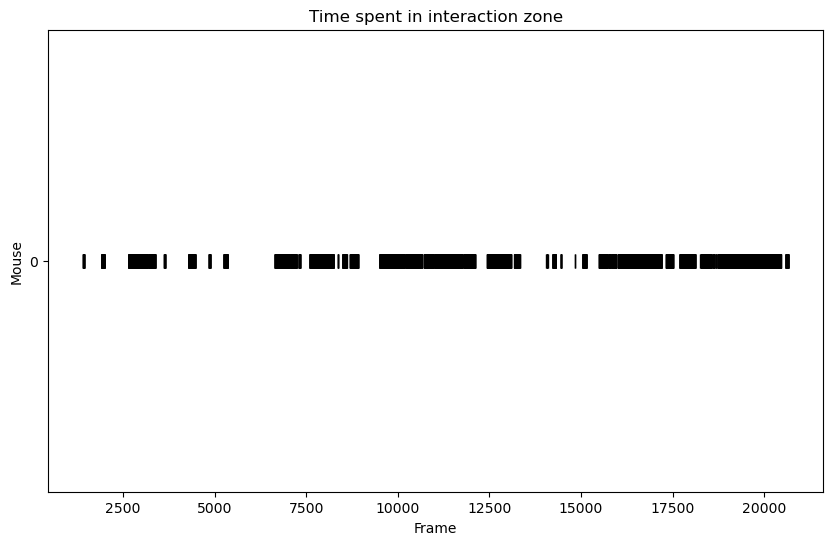

In [50]:
# Initialize an empty list to store frame indices for each trial
filtered_frames = []

head_x = sess.tunnel_df['head_x']
head_y = sess.tunnel_df['head_y']
    
# interaction zone x = [300,400] y=[200,300]
# int_zone = (nose_x >= 300) & (nose_x <= 400) & (nose_y >= 200) & (nose_y <= 300)
int_zone = (head_x >= 300) & (head_x <= 400) & (head_y >= 200) & (head_y <= 250)

frame_indices = np.where(int_zone)[0]  

filtered_frames.append(frame_indices)

    
# plot raster for sanity check 
fig, ax = plt.subplots(figsize=(10, 6))

for i, frames in enumerate(filtered_frames):
    ax.plot(frames, np.ones_like(frames) * i, '|', color='black', markersize=10)  # Raster points for each trial

# Labeling the plot
ax.set_title('Time spent in interaction zone')
ax.set_xlabel('Frame')
ax.set_ylabel('Mouse')
ax.set_yticks(range(len(filtered_frames)))
# ax.set_yticklabels(df['name'])

ax.set_ylim(-1, len(filtered_frames))

plt.show()

In [976]:
sess.tunnel_df = df
print(sess.tunnel_df.keys())
TwoPUtils.sess.save_session(sess,'C:/Users/esay/data/social_interaction/VRPkls')


dict_keys(['locations', 'head_velocity', 'interaction', 'rightear_x', 'rightear_y', 'tailbase_x', 'tailbase_y', 'nose_x', 'nose_y', 'head_x', 'head_y', 'leftear_x', 'leftear_y', 'torso_x', 'torso_y'])
